In [2]:
import pandas as pd
import numpy as np
import catboost
from sklearn.model_selection import train_test_split

In [3]:
heart = pd.read_csv('e:/programming/samples/heart.csv')


In [4]:
data = heart.columns
data

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = heart.drop('target', axis=1)
#y = heart('target')
y = np.array(heart.target)

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=17)
#print(X_train.shape, X_validation.shape)

In [8]:
from catboost import CatBoostClassifier
#from catboost import CatBoostRegressor

In [19]:
cbr = CatBoostClassifier()
cbr.fit(X_train, y_train)

1	total: 2.7s	remaining: 1.69s
615:	learn: 0.1541164	total: 2.7s	remaining: 1.69s
616:	learn: 0.1538658	total: 2.71s	remaining: 1.68s
617:	learn: 0.1535724	total: 2.71s	remaining: 1.68s
618:	learn: 0.1534442	total: 2.71s	remaining: 1.67s
619:	learn: 0.1532166	total: 2.72s	remaining: 1.67s
620:	learn: 0.1530423	total: 2.72s	remaining: 1.66s
621:	learn: 0.1529532	total: 2.73s	remaining: 1.66s
622:	learn: 0.1527372	total: 2.73s	remaining: 1.65s
623:	learn: 0.1525737	total: 2.73s	remaining: 1.65s
624:	learn: 0.1523445	total: 2.73s	remaining: 1.64s
625:	learn: 0.1521805	total: 2.74s	remaining: 1.64s
626:	learn: 0.1519585	total: 2.74s	remaining: 1.63s
627:	learn: 0.1516822	total: 2.74s	remaining: 1.63s
628:	learn: 0.1514472	total: 2.75s	remaining: 1.62s
629:	learn: 0.1512630	total: 2.75s	remaining: 1.61s
630:	learn: 0.1511821	total: 2.76s	remaining: 1.61s
631:	learn: 0.1509311	total: 2.76s	remaining: 1.61s
632:	learn: 0.1507684	total: 2.77s	remaining: 1.6s
633:	learn: 0.1506740	total: 2.77s	

In [20]:
print('Resulting tree count:', cbr.tree_count_)

Resulting tree count: 1000


In [21]:
prediction = cbr.predict(X_validation)
prediction

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mean_squared_error(y_validation, prediction)

0.1978021978021978

In [24]:
mean_absolute_error(y_validation, prediction)

0.1978021978021978

In [25]:
from catboost import Pool

In [26]:
shap_values = cbr.get_feature_importance(Pool(X, y), type='ShapValues')
shap_values

array([[-0.32962342, -0.41764554,  0.60100909, ...,  0.80649046,
         0.11602839,  0.52847476],
       [ 0.5612102 , -0.3052264 ,  0.65711511, ...,  0.66452017,
         0.36033877,  0.52847476],
       [ 0.38257158,  0.80150777,  0.27969066, ...,  0.79291837,
         0.44089732,  0.52847476],
       ...,
       [-0.00238328, -0.35754797, -0.68319886, ..., -0.96871336,
        -0.57175632,  0.52847476],
       [-0.10298476, -0.30387164, -0.88972917, ..., -0.91936369,
        -0.7705637 ,  0.52847476],
       [-0.24623111,  0.9406506 ,  0.27972416, ..., -1.11080532,
         0.39335491,  0.52847476]])

In [27]:
df = [50,1,0,130,90,0,0,50,1,0,1,1,0]

In [28]:
prediction_proba = cbr.predict_proba(df)
prediction_proba

array([0.83775947, 0.16224053])

In [47]:
import matplotlib.pyplot as plt
import shap
shap.initjs()

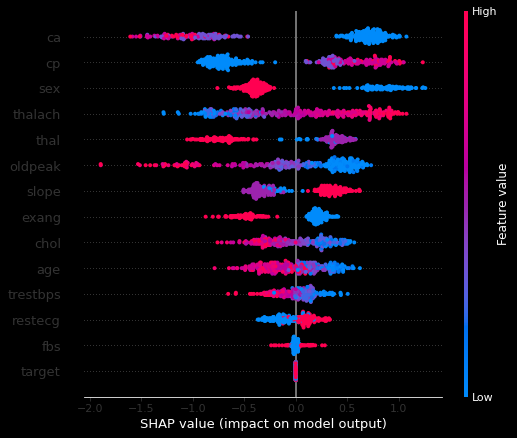

In [36]:
shap_test = shap.TreeExplainer(cbr).shap_values(heart)
shap.summary_plot(shap_test, heart, max_display=25, auto_size_plot=True)


In [54]:
explainer = shap.TreeExplainer(cbr)
shap_values = explainer.shap_values(X)
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[2,:])

In [29]:
cbr.save_model('e:/programming/save_files/heart_cbr')